### Introduction

In this project I will analyze passenger data from the passenger liner RMS Titanic's tragic maiden voyage in April of 1912. I will use the dataset located at https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download?_ga=1.248296128.651510525.1453551417 as the basis for my analysis. The dataset "contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic".

**Dataset description** from Kaggle:

~~~~
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
~~~~

I will start by doing some exploratory data analysis with the following initial question in mind:
- **Which factor(s) had the greatest impact on passenger survival rate?**

In [1]:
#Importing libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from IPython.display import display
from IPython.display import HTML
from scipy import stats

%matplotlib inline

In [2]:
#loading data

titanic = pd.read_csv('titanic_data.csv')

In [3]:
#Inital exploration

from IPython.display import display

print(titanic.columns)

print("number of passenger records:", len(titanic))

display(titanic.head(5))

display(titanic.iloc[5])

display(titanic.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
number of passenger records: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

Some of the variables (Name, Sex, Ticket, Cabin, Embarked) are not numeric. Of these, 'Sex' and 'Embarked' are interesting for analysis, and I will therefore convert them into boolean variables to be able to perform mathematical operations on them. 

'Cabin' could also be interesting to take a closer look at, but since the dataset only contains cabin data for 204 of 891 records, I will not focus on cabins in my analysis. It is possible the passenger records containing cabin data is skewed in one or more ways.

In [4]:
#Making 'Sex' and 'Embarked' numeric to be able to perform mathematical operations using the variables
titanic = pd.concat([titanic,pd.get_dummies(titanic['Sex'],prefix='is'),
                    pd.get_dummies(titanic['Embarked'],prefix='embarked')], axis=1)
                     

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,is_male,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0,1.0


In [5]:
#Checking data is correct
display(titanic[(
        (titanic['is_male'] == 1) & (titanic['Sex'] != 'male') |
        (titanic['is_female'] == 1) & (titanic['Sex'] != 'female') |
        (titanic['embarked_S'] == 1) & (titanic['Embarked'] != 'S') |
        (titanic['embarked_C'] == 1) & (titanic['Embarked'] != 'C') |
        (titanic['embarked_Q'] == 1) & (titanic['Embarked'] != 'Q')
        )])

print("Expecting 0 records returned.")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,is_male,embarked_C,embarked_Q,embarked_S


Expecting 0 records returned.


In [6]:
#Getting a quick overview by aggregating the dataset
round(titanic.describe(),2)

/Users/ggaasemyr/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,is_male,embarked_C,embarked_Q,embarked_S
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20,0.35,0.65,0.19,0.09,0.72
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69,0.48,0.48,0.39,0.28,0.45
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,223.50,0.00,2.00,NaN,0.00,0.00,7.91,0.00,0.00,0.00,0.00,0.00
50%,446.00,0.00,3.00,NaN,0.00,0.00,14.45,0.00,1.00,0.00,0.00,1.00
75%,668.50,1.00,3.00,NaN,1.00,0.00,31.00,1.00,1.00,0.00,0.00,1.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33,1.00,1.00,1.00,1.00,1.00


From this we observe some interesting details:
* 38% of the passengers survived
* 65% of the passengers were male; 35% of the passengers were female
* The average age of the passengers was almost 30 years old
* A large majority (72%) of the passengers embarked from Southampton, while 19% embarked from Cherbourg, and 9% embarked from Queenstown.

,Survived
PassengerId,-0.01
Survived,1.00
Pclass,-0.34
Age,-0.08
SibSp,-0.04
Parch,0.08
Fare,0.26
is_female,0.54
is_male,-0.54
embarked_C,0.17


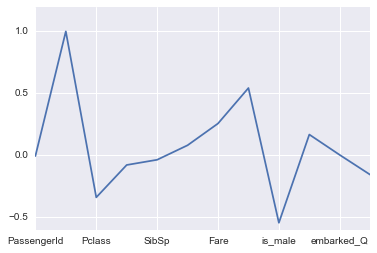

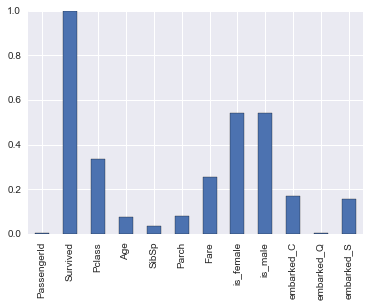

In [7]:
#Looking at survival correlation using the Pandas corr() (Pearson's correlation coefficient) function

survival_correlation = titanic.corr(method='pearson')['Survived']

display(round(survival_correlation,2).to_frame())

survival_correlation.plot()
plt.show()

#Squaring the correlation coefficients to clearer visualize the comparative correlation strengths
np.sqrt(survival_correlation ** 2).plot(kind='bar')

This indicates that 'sex' (being female) and 'passenger class' were the most important factors for survival on the Titanic, with high and medium correlation scores. 'Ticket price' also has a fairly large correlation score (Pearson's correlation coefficient). I suspect this is due to better ticket classes costing more, which I will look into next.

In [8]:
#Checking correlation of fare and the other variables. Focusing mainly on Pclass.
display(round(titanic.corr(method='pearson')['Fare'],2).to_frame())

display(round(titanic.groupby('Pclass')['Fare'].describe(),2).to_frame())

,Fare
PassengerId,0.01
Survived,0.26
Pclass,-0.55
Age,0.10
SibSp,0.16
Parch,0.22
Fare,1.00
is_female,0.18
is_male,-0.18
embarked_C,0.27


Fare
Pclass              
1      count  216.00
       mean    84.15
       std     78.38
       min      0.00
       25%     30.92
       50%     60.29
       75%     93.50
       max    512.33
2      count  184.00
       mean    20.66
       std     13.42
       min      0.00
       25%     13.00
       50%     14.25
       75%     26.00
       max     73.50
3      count  491.00
       mean    13.68
       std     11.78
       min      0.00
       25%      7.75
       50%      8.05
       75%     15.50
       max     69.55

Each ticket class had some passengers who paid zero fare for their tickets. I will take a closer look at these passengers.

In [9]:
#Looking further at the passengers who did not pay for their tickets (ticket price 0)

zero_fare = (titanic[titanic['Fare'] == 0].sort_values('Pclass'))

display(zero_fare)

print("1st class passenger with 0 ticket price:",zero_fare[zero_fare['Pclass'] == 1]['Pclass'].count())
print("2nd class passenger with 0 ticket price:",zero_fare[zero_fare['Pclass'] == 2]['Pclass'].count())
print("3rd class passenger with 0 ticket price:",zero_fare[zero_fare['Pclass'] == 3]['Pclass'].count())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_female,is_male,embarked_C,embarked_Q,embarked_S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0.0,1.0,0.0,0.0,1.0
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0.0,1.0,0.0,0.0,1.0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,0.0,1.0,0.0,0.0,1.0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,0.0,1.0,0.0,0.0,1.0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,0.0,1.0,0.0,0.0,1.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0.0,1.0,0.0,0.0,1.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,0.0,1.0,0.0,0.0,1.0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,0.0,1.0,0.0,0.0,1.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0.0,1.0,0.0,0.0,1.0
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S,0.0,1.0,0.0,0.0,1.0


1st class passenger with 0 ticket price: 5
2nd class passenger with 0 ticket price: 6
3rd class passenger with 0 ticket price: 4


There were relatively few passengers in each class who paid 0 fare for their tickets, but it's still worth excluding these records and take a look at correlation again.

In [10]:
#Checking for corelation again, excluding passenger who did not pay for their tickets.

display(round((titanic[titanic['Fare'] > 0].corr(method='pearson')['Fare']),2).to_frame())

,Fare
PassengerId,0.02
Survived,0.25
Pclass,-0.56
Age,0.10
SibSp,0.16
Parch,0.21
Fare,1.00
is_female,0.18
is_male,-0.18
embarked_C,0.27


Since the correlation between ticket class and ticket price is very high, I will consider ticket class alone as sufficent for analyzing the impact of social class on survival rate.

### Sex and ticket class

In [11]:
#counting survivors by ticket class and sex
gb_survival_class_sex = titanic.groupby(['Pclass','Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_class_sex['percent_survived'] = round(
    (gb_survival_class_sex['Survived'] / gb_survival_class_sex['Passengers']) * 100,2
)

#counting survivors by sex
gb_survival_by_sex = titanic.groupby(['Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_by_sex['percent_survived'] = round(
    (gb_survival_by_sex['Survived'].div(gb_survival_by_sex['Passengers'],level='Sex')) * 100,2)

display(gb_survival_class_sex)
display(gb_survival_by_sex)

Passengers  Survived  percent_survived
Pclass Sex                                           
1      female          94        91             96.81
       male           122        45             36.89
2      female          76        70             92.11
       male           108        17             15.74
3      female         144        72             50.00
       male           347        47             13.54

,Passengers,Survived,percent_survived
Sex,,,
female,314,233,74.20
male,577,109,18.89


We see here why the correlation between survival and sex is so high: 74.2% of females survived, but only 18.9% of males survived.

Passengers  Survived  percent_survived  Died
Pclass Sex                                                 
1      female          94        91             96.81     3
       male           122        45             36.89    77
2      female          76        70             92.11     6
       male           108        17             15.74    91
3      female         144        72             50.00    72
       male           347        47             13.54   300

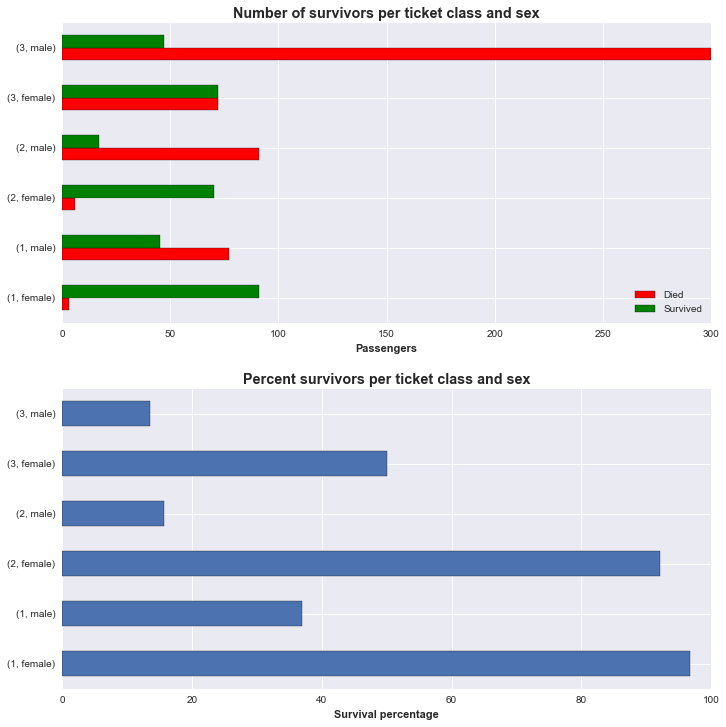

In [12]:
gb_survival_class_sex['Died'] = gb_survival_class_sex['Passengers'] - gb_survival_class_sex['Survived']

display(gb_survival_class_sex)

fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(10,10))

plt.title("Number of survivors per ticket class and sex")

gbplot1 = gb_survival_class_sex[['Died','Survived']].plot(
    kind='barh',ax=axes[0],color=['r','g'])

gbplot1.set_xlabel("Passengers",fontweight='bold')
gbplot1.set_ylabel("")
gbplot1.set_title("Number of survivors per ticket class and sex",
                  fontsize='x-large',fontweight='bold')

gbplot2 = gb_survival_class_sex['percent_survived'].plot(kind='barh',ax=axes[1])

gbplot2.set_xlabel("Survival percentage",fontweight='bold')
gbplot2.set_ylabel("")
gbplot2.set_title("Percent survivors per ticket class and sex",
                 fontsize='x-large',fontweight='bold')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)


The plots above highlight how much class determined one's likelihood of survival on the Titanic. We see that while the large majority of females in 2nd class and 1st class survived, only half of the females in 3rd class survived. It's interesting to observe that this group of passengers still had a higher survival rate than any of the male groups, where the highest survival rates were found in the first class passenger group. Only a little over a third of the male first class passengers survived.

In [13]:
#T-test to test for statistical significance of difference between male and female survival rate
t,p = stats.ttest_ind(
    titanic[titanic['is_female'] == 1]['Survived'],
    titanic[titanic['is_male'] == 1]['Survived'])

print("Testing statistical significance of male and female survival rate")
print(("t-test    t: {0}   p: {1}").format(round(t,2),p))

Testing statistical significance of male and female survival rate
t-test    t: 19.3   p: 1.4060661308802594e-69


In [54]:
first_class_survived = titanic[titanic['Pclass'] == 1]['Survived']
second_class_survived = titanic[titanic['Pclass'] == 2]['Survived']
third_class_survived = titanic[titanic['Pclass'] == 3]['Survived']

f,p = stats.f_oneway(first_class_survived,second_class_survived,third_class_survived)

print("Testing statistical signficance of differences in survival rate per ticket class.")
print(("One-way Anova test:    F-statistic: {0}   p: {1}").format(round(f,2),p))

Testing statistical signficance of differences in survival rate per ticket class.
One-way Anova test:    F-statistic: 57.96   p: 2.1832474151179777e-24


### Embarked

In [17]:
#Survival correlation for ports of departure
titanic[['Survived','embarked_C','embarked_Q','embarked_S']].corr()['Survived'].to_frame()

,Survived
Survived,1.00000
embarked_C,0.16824
embarked_Q,0.00365
embarked_S,-0.15566


Pearson correlation coefficients for 'Survival' indicates different survival rates depending upon which port the passenger embarked from on their journey on the Titanic. It will be interesting to see if we can figure out what caused this.

Survived,0,1,All,percent_survived
Embarked,,,,
C,75,93,168,55.36
Q,47,30,77,38.96
S,427,217,644,33.70
All,549,340,889,38.25


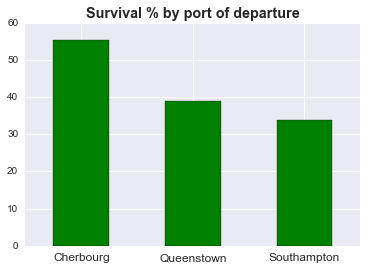

In [18]:
survival_by_embarked = pd.crosstab(titanic['Embarked'],titanic['Survived'],margins=True)
survival_by_embarked['percent_survived'] = round((survival_by_embarked[1] / survival_by_embarked['All'])*100,2)

display(survival_by_embarked)

ax = survival_by_embarked.loc[['C','Q','S']]['percent_survived'].plot(kind='bar',color='g')

#ax.set_xticklabels(['Cherbourg','Queenstown','Southampton'],rotation=0)

ax.set_title('Survival % by port of departure',fontsize='x-large',fontweight='bold')
ax.set_xticklabels(['Cherbourg','Queenstown','Southampton'],rotation='horizontal',fontsize='large')
ax.set_xlabel('')

We see here that passengers embarking from Cherbourg had drastically higher survival rates than passengers embarking from Queenstown or Southampton. Before I consider other factors, I want to find out if this difference is statistically significant.

In [19]:
#One-way Anova test for statistical significance
from scipy import stats

embarked_cherbourg = titanic[titanic['Embarked'] == 'C']
embarked_queenstown = titanic[titanic['Embarked'] == 'Q']
embarked_southampton = titanic[titanic['Embarked'] == 'S']

f,p = stats.f_oneway(
    embarked_cherbourg['Survived'],embarked_queenstown['Survived'],embarked_southampton['Survived'])

print("F-statistic: {0}    P: {1}".format(round(f,2),p))

F-statistic: 13.61    P: 1.514339014290716e-06


According to the f statistic and p value returned from the anova test, the different survival rates between the ports of departure are very statistically significant. Next, I will take a closer look at 'Sex' as a potential factor impacting the higher survival rate for passengers embarking from Cherbourg. Perhaps the female ratio, which we know is a statistically significant factor for survival, is higher?

In [20]:
#Looking at percentage of females and males embarking in the different cities
sex_by_embarked = pd.crosstab(titanic['Embarked'],titanic['Sex'],margins=True)
sex_by_embarked['percent_female'] = round((sex_by_embarked['female'] / sex_by_embarked['All']) * 100,2)
sex_by_embarked['percent_male'] = round((sex_by_embarked['male'] / sex_by_embarked['All']) * 100,2)

sex_by_embarked

Sex,female,male,All,percent_female,percent_male
Embarked,,,,,
C,73,95,168,43.45,56.55
Q,36,41,77,46.75,53.25
S,203,441,644,31.52,68.48
All,312,577,889,35.10,64.90


In [21]:
#T-test to for statistical significance of difference between ratio of Cherbourg and Southampton female passengers

t,p = stats.ttest_ind(embarked_cherbourg['is_female'],embarked_queenstown['is_female'])

print("Testing statistical significance of female ratio differences between Cherbourg and Queenstown.")
print(("t-test    t: {0}   p: {1}").format(round(t,2),p))

Testing statistical significance of female ratio differences between Cherbourg and Queenstown.
t-test    t: -0.48   p: 0.6310202034628892


Passengers embarking from Cherbourg had 12 percentage points more women than passengers embarking from Southampton. The difference between female percentage of Cherbourg and Queenstown passengers, however, was only 3.3 percentage points. This is not a statistically significant difference (p-value 0.63).

Next I will take a look to see if the males and females of the different embarking groups had similar survival rates.

Passengers  Survived  percent_survived
Embarked Sex                                           
C        female          73        64             87.67
         male            95        29             30.53
Q        female          36        27             75.00
         male            41         3              7.32
S        female         203       140             68.97
         male           441        77             17.46

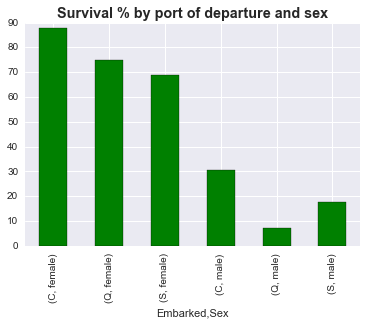

In [76]:
gb_survival_embarked_sex = titanic.groupby(
    ['Embarked','Sex'])['Survived'].agg({'Passengers':'count','Survived':'sum'})
#calculating percentage of survivors
gb_survival_embarked_sex['percent_survived'] = round(
    (gb_survival_embarked_sex['Survived'] / gb_survival_embarked_sex['Passengers']) * 100,2
)



display(gb_survival_embarked_sex)

ax = gb_survival_embarked_sex.sort_index(level='Sex')['percent_survived'].plot(kind='bar',color='g')

ax.set_title('Survival % by port of departure and sex',fontsize='x-large',fontweight='bold')


Of the passengers embarking from Cherbourg, both males and females had a greater survival rate compared to males and females embarking from the other port cities. This suggests that the sex of the passengers was not the primary cause for the larger Cherbourg survival rate.

In [23]:
#Looking for departure city correlations

display(titanic.corr(method='pearson')[['embarked_C','embarked_Q','embarked_S']])

,embarked_C,embarked_Q,embarked_S
PassengerId,-0.001205,-0.033606,0.022148
Survived,0.168240,0.003650,-0.155660
Pclass,-0.243292,0.221009,0.081720
Age,0.036261,-0.022405,-0.032523
SibSp,-0.059528,-0.026354,0.070941
Parch,-0.011069,-0.081228,0.063036
Fare,0.269335,-0.117216,-0.166603
is_female,0.082853,0.074115,-0.125722
is_male,-0.082853,-0.074115,0.125722
embarked_C,1.000000,-0.148258,-0.778359


This shows a fairly strong correlation between embarking in Cherbourg and Passenger class.

Pclass,1,2,3,All,percent_1st_class
Embarked,,,,,
C,85.00,17.0,66.00,168.0,50.60
Q,2.00,3.0,72.00,77.0,2.60
S,127.00,164.0,353.00,644.0,19.72
All,214.00,184.0,491.00,889.0,24.07
percent_in_class,24.07,20.7,55.23,100.0,2.71


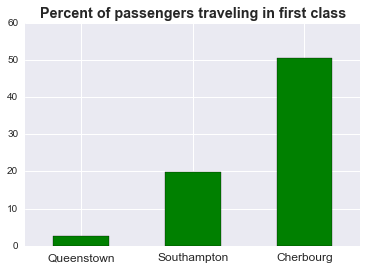

In [24]:
embarked_by_class = pd.crosstab(titanic['Embarked'],titanic['Pclass'],margins=True)

embarked_by_class['percent_1st_class'] = round((embarked_by_class[1] / embarked_by_class['All'])*100,2)
embarked_by_class.loc['percent_in_class'] = round(
    (embarked_by_class.loc['All'] / embarked_by_class['All']['All'])*100,2)

display(embarked_by_class)

#ax = embarked_by_class.sort_index(level='Sex')['percent_survived'].plot(kind='bar',color='g')
ax = embarked_by_class['percent_1st_class'][['Q','S','C']].plot(
    kind='bar',color='g')

ax.set_title('Percent of passengers traveling in first class',fontsize='x-large',fontweight='bold')
ax.set_xticklabels(['Queenstown','Southampton','Cherbourg'],rotation='horizontal',fontsize='large')
ax.set_xlabel('')

Based on this data, it seems like one of the reasons for the higher survival rate of passengers departing from Cherbourg was the much larger percentage of passengers travelling in first class, compared to the passengers who embarked from Southampton and Queenstown.

### Age

Although the correlation coefficiant for survival and age wasn't very high, it will be interesting to take a look to see if there was an age cutoff that changed the survival rate drastically.

In [25]:
#Creating age brackets and removing records with missing ageb

#Removing records that are missing age data
age_data = titanic[titanic['Age'].isnull() == False][['Age','Survived','Sex']]

#Earlier we saw that the maximum age is 80, so I am setting the cutoff at 80
bins = [0,5,10,15,20,30,40,50,60,70,80]
bracket_names = ['0 to 5','6 to 10','11 to 15','16 to 20','21 to 30','31 to 40','41 to 50','51 to 60',
              '61 to 70','71 to 80']
categories = pd.Series(pd.cut(age_data['Age'], bins ,labels=bracket_names))

age_data['age_brackets'] = categories

display(age_data.head(5))

print("Number of passengers used for age analysis:", len(age_data))

,Age,Survived,Sex,age_brackets
0,22.0,0,male,21 to 30
1,38.0,1,female,31 to 40
2,26.0,1,female,21 to 30
3,35.0,1,female,31 to 40
4,35.0,0,male,31 to 40


Number of passengers used for age analysis: 714


In [26]:
##Looking at the distribution of males and females in the different age brackets
pd.crosstab(age_data['age_brackets'],age_data['Sex'])

Sex,female,male
age_brackets,,
0 to 5,21,23
6 to 10,10,10
11 to 15,12,7
16 to 20,34,62
21 to 30,81,149
31 to 40,55,100
41 to 50,31,55
51 to 60,14,28
61 to 70,3,14


Looking at the aggregated data like this, it becomes clear that some of the age brackets have very few passengers in them. It is possible this may affect the statistical signficance of further passenger age analysis.

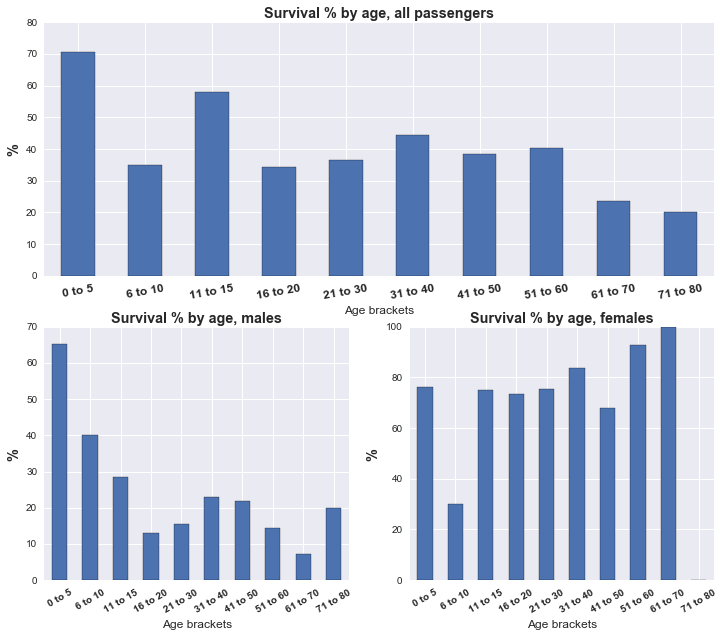

In [27]:
#Plotting age brackets for all passengers as well as for males and females

#Grouping brackets
age_count = age_data.groupby('age_brackets')['age_brackets'].agg('count')
age_male_count = age_data[age_data['Sex'] == 'male'].groupby('age_brackets')['age_brackets'].agg('count')
age_female_count = age_data[age_data['Sex'] == 'female'].groupby('age_brackets')['age_brackets'].agg('count')

#Grouping by age of survivors
survivor_ages = age_data[age_data['Survived'] == True]

#Grouping by age and sex of survivors                                            
survivor_ages_males = age_data[(age_data['Survived'] == True) & (age_data['Sex'] == 'male')]
survivor_ages_females = age_data[(age_data['Survived'] == True) & (age_data['Sex'] == 'female')]

survived_age_count = survivor_ages.groupby('age_brackets')['age_brackets'].agg('count')
survived_age_male_count = survivor_ages_males.groupby('age_brackets')['age_brackets'].agg('count')
survived_age_female_count = survivor_ages_females.groupby('age_brackets')['age_brackets'].agg('count')

survivor_age_groups = (survived_age_count / age_count) * 100
survivor_age_male_groups = (survived_age_male_count / age_male_count) * 100
survivor_age_female_groups = (survived_age_female_count / age_female_count) * 100


fig = plt.figure(figsize=(12,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan=2,)
ax2 = plt.subplot2grid((2,2), (1, 0))
ax3 = plt.subplot2grid((2,2), (1, 1))

#all passengers plot
survivor_age_groups.plot(kind='bar',ax=ax1)
ax1.set_title('Survival % by age, all passengers',fontsize='x-large',fontweight='bold')
ax1.set_xticklabels(survivor_age_groups.index.values,rotation='10',
                    fontweight='bold',fontsize='large'),
ax1.set_xlabel('Age brackets',fontsize='large')
ax1.set_ylabel('%',fontsize='x-large',fontweight='bold')

#male plot
survivor_age_male_groups.plot(kind='bar',ax=ax2)
ax2.set_title('Survival % by age, males',fontsize='x-large',fontweight='bold')
ax2.set_xticklabels(survivor_age_groups.index.values,rotation='30',
                    fontweight='bold',fontsize='medium')
ax2.set_xlabel('Age brackets',fontsize='large')
ax2.set_ylabel('%',fontsize='x-large',fontweight='bold')

#female plot
survivor_age_female_groups.plot(kind='bar', ax=ax3)
ax3.set_title('Survival % by age, females',fontsize='x-large',fontweight='bold')
ax3.set_xticklabels(survivor_age_groups.index.values,rotation='30',
                    fontweight='bold',fontsize='medium')
ax3.set_xlabel('Age brackets',fontsize='large')
ax3.set_ylabel('%',fontsize='x-large',fontweight='bold')


We see here that the youngest children seemed to be prioritized for the lifeboats on Titanic, as the 0 to 5 age bracket had the highest survival rate. Somewhat surprisingly, this is not also the case for the children of age 6 to 10, which had a much lower survival rate. This might be due to small sample size: only 20 out of 714 passengers fall into this age bracket.

In [51]:
#scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')

t_test_sample = age_data[age_data['age_brackets'] == '6 to 10']['Survived']
pop_mean = age_data['Survived'].mean()

t,p = stats.ttest_1samp(t_test_sample,pop_mean)

print("T-statistic: {0}    P: {1}".format(round(t,2),p))

T-statistic: -0.51    P: 0.6136902134462902


The one-sample t-test confirms the suspicion: the survival rate of 6-10 year olds is not statistically significant.

In [44]:
#One-way Anova test for statistical significance of differences in survival rates between the different age groups.

f,p = stats.f_oneway(*[age_data[age_data['age_brackets'] == bracket]['Survived'] for 
                       bracket in bracket_names])

print("F-statistic: {0}    P: {1}".format(round(f,2),p))

F-statistic: 2.97    P: 0.0017923299329817362


In [66]:
young_greater_chance = round((age_data[age_data['age_brackets'] == '0 to 5']['Survived'].mean() 
                        / age_data[age_data['age_brackets'] != '0 to 5']['Survived'].mean()) * 100,2)

print(
    "Passengers between age 0 to 5 had a {}% greater chance of surviving than the mean survival rate for other passengers."
    .format(young_greater_chance))

t_test_sample = age_data[age_data['age_brackets'] == '0 to 5']['Survived']
pop_mean = age_data['Survived'].mean()

t,p = stats.ttest_1samp(t_test_sample,pop_mean)

print("T-statistic: {0}    P: {1}".format(round(t,2),round(p,6)))

Passengers between age 0 to 5 had a 182.26% greater chance of surviving than the mean survival rate for other passengers.
T-statistic: 4.29    P: 0.0001


The survival rate for 0 to 5 year old passengers is statistically significant.

### Concluding thoughts:

In [75]:
#simple comparisons

def greater_survival(df,parameter,value1,value2):
    
    if value2 == 0:
       percentage = (df[df[parameter] == value1]['Survived'].mean() / 
                     df[df[parameter] != value1]['Survived'].mean()) * 100
    else:
       percentage = (df[df[parameter] == value1]['Survived'].mean() /
                     df[df[parameter] == value2]['Survived'].mean()) * 100 
    
    return round(percentage,2)

print("Higher chance of surviving for females: {}%".format(greater_survival(titanic,'Sex','male',0)))
print("Higher chance of surviving for 1st class compared to 2nd class: {}%".
      format(greater_survival(titanic,'Pclass',1,2)))
print("Higher chance of surviving for 1st class compared to 3rd class: {}%".
      format(greater_survival(titanic,'Pclass',1,3)))

Higher chance of surviving for females: 25.46%
Higher chance of surviving for 1st class compared to 2nd class: 133.16%
Higher chance of surviving for 1st class compared to 3rd class: 259.79%


The analysis of the Titanic dataset suggests that three major factors affecting the survival rate of passengers on the Titanic were: sex (females were 25% more likely to survive the incident, regardless of other factors such as class and age), class (first class passengers were 133% more likely to survive than passengers in 2nd class, and 260% more likely to survive than passengers in 3rd class), and finally, age, where children between the ages of 0 and 5 years were 182% more likely to survive than all other passengers.

### _Sources_


__Python documentation, book:__  
McKinney, Wes, 2012. _Python for Data Analysis_. O'Reilly Media

__Python documentation, websites:__  
http://docs.scipy.org/doc/scipy/reference/index.html
http://iaingallagher.tumblr.com/post/50980987285/t-tests-in-python
http://matplotlib.org/api/pyplot_api.html
http://nullege.com/codes/search/scipy.stats.f_oneway
http://pandas.pydata.org/pandas-docs/stable/
http://pandas.pydata.org/pandas-docs/stable/index.html
http://stackoverflow.com/
https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

__Dataset details:__  
https://www.kaggle.com/c/titanic/data



__Statistics resources:__  
Statistical methods and terminology are largely based on teachings from the Descriptive Statistics and Inferential Statistics Udacity courses.